In [49]:
import pandas as pd
from pathlib import Path
import matplotlib
import matplotlib.pyplot as plt
import hvplot.pandas
import numpy as np
import sklearn
import statsmodels as sm
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [19]:
file_path = Path(r"C:\Users\rohan\Downloads\machine_temp_failure_missing.csv")
df_missing = pd.read_csv(file_path)
df_missing.head()


,timestamp,value
0,02-12-2013 21:15,73.967322
1,02-12-2013 21:20,74.935882
2,02-12-2013 21:25,76.124162
3,02-12-2013 21:30,78.140707
4,02-12-2013 21:35,79.329836


In [20]:
df_missing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22695 entries, 0 to 22694
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  22695 non-null  object 
 1   value      21410 non-null  float64
dtypes: float64(1), object(1)
memory usage: 354.7+ KB


In [23]:
missing_values = df_missing.isnull().sum()
missing_values

timestamp       0
value        1285
dtype: int64

In [24]:
statistics = df_missing.describe()
statistics


,value
count,21410.000000
mean,85.968188
std,13.553070
min,2.084721
25%,83.082867
50%,89.251290
75%,93.910748
max,108.510543


In [26]:
df_missing.rename(columns={'value': 'temperature'}, inplace=True)
df_missing.head()


,timestamp,temperature
0,02-12-2013 21:15,73.967322
1,02-12-2013 21:20,74.935882
2,02-12-2013 21:25,76.124162
3,02-12-2013 21:30,78.140707
4,02-12-2013 21:35,79.329836


In [27]:
df_missing['delta_temperature'] = df_missing['temperature'].diff()
print("updated df:")
print(df_missing.head())

updated df:
          timestamp  temperature  delta_temperature
0  02-12-2013 21:15    73.967322                NaN
1  02-12-2013 21:20    74.935882           0.968560
2  02-12-2013 21:25    76.124162           1.188280
3  02-12-2013 21:30    78.140707           2.016546
4  02-12-2013 21:35    79.329836           1.189128


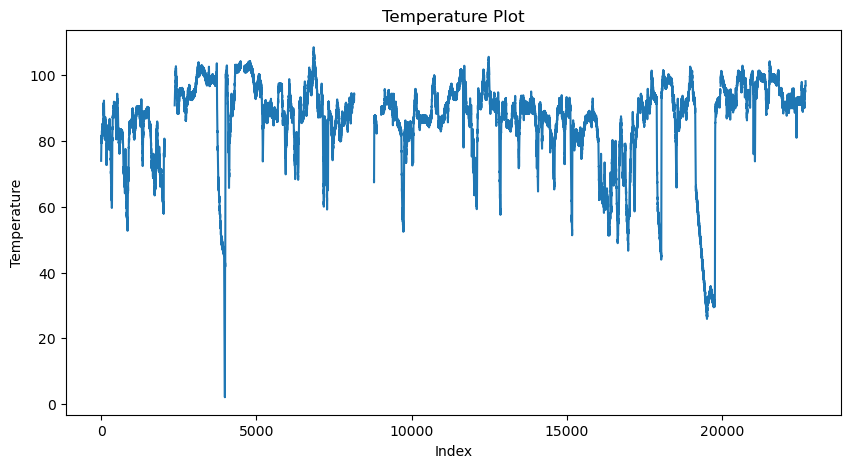

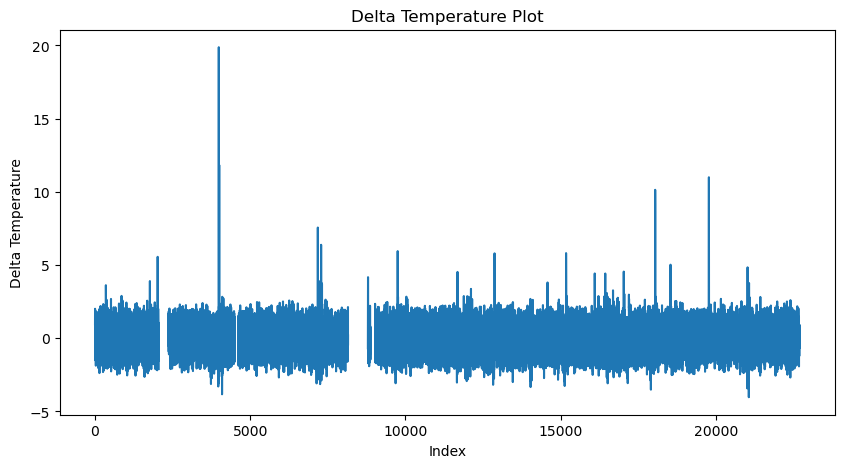

In [29]:
plt.figure(figsize=(10, 5))
plt.plot(df_missing.index, df_missing['temperature'])
plt.xlabel('Index')
plt.ylabel('Temperature')
plt.title('Temperature Plot')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(df_missing.index, df_missing['delta_temperature'])
plt.xlabel('Index')
plt.ylabel('Delta Temperature')
plt.title('Delta Temperature Plot')
plt.show()

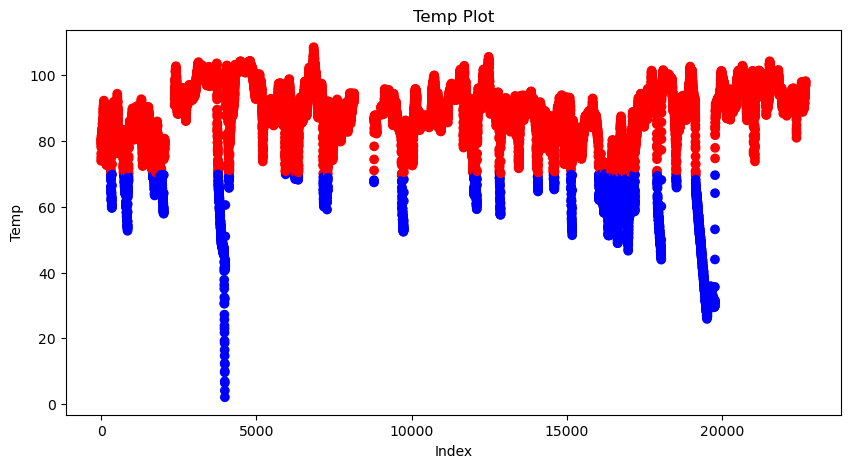

In [31]:
colors = ['red' if temp > 70.00 else 'blue' for temp in df_missing['temperature']]
plt.figure(figsize = (10,5))

plt.scatter(df_missing.index, df_missing['temperature'], c = colors)
plt.title('Temp Plot')
plt.xlabel('Index')
plt.ylabel('Temp')

plt.show()


,timestamp,value
0,2013-12-02 21:15:00,73.967322
1,2013-12-02 21:20:00,74.935882
2,2013-12-02 21:25:00,76.124162
3,2013-12-02 21:30:00,78.140707
4,2013-12-02 21:35:00,79.329836


,timestamp,temperature
0,2013-12-02 21:15:00,73.967322
1,2013-12-02 21:20:00,74.935882
2,2013-12-02 21:25:00,76.124162
3,2013-12-02 21:30:00,78.140707
4,2013-12-02 21:35:00,79.329836


In [35]:
def read_datasets(folder, file, date_col=None):
 
    
    df = pd.read_csv(folder / file, 
                     index_col=date_col, 
                     parse_dates=[date_col])
    return df

In [ ]:
def plot_dfs(df1, df2, col, title=None, xlabel=None, ylabel=None):
    
    df_missing = df2.rename(columns={col: 'missing'})

    columns = df_missing.loc[:, 'missing':].columns.tolist()
    subplots_size = len(columns)

    fig, ax = plt.subplots(subplots_size + 1, 1, sharex=True, figsize=(10, 6 * (subplots_size + 1)))
    plt.subplots_adjust(hspace=0.25)
    fig.suptitle(title)

    ax[0].plot(df1[col])
    ax[0].set_title('Original Dataset')
    ax[0].set_xlabel(xlabel)
    ax[0].set_ylabel(ylabel)

    for i in range(subplots_size):
        colname = columns[i]
        ax[i + 1].plot(df_missing[colname])
        ax[i + 1].set_title(colname)

    plt.show()

In [36]:
def rmse_score(df1, df2, col=None):
    
    df_missing = df2.rename(columns={col: 'missing'})
    columns = df_missing.loc[:, 'missing':].columns.tolist()
    scores = []
    for comp_col in columns[1:]:
        diff = df1[col] - df_missing[comp_col]
        mse = np.mean(diff**2)
        rmse = np.sqrt(mse)
        scores.append(rmse)
        print(f'RMSE for {comp_col}: {rmse}')
    return scores

In [42]:

original_df = pd.read_csv(r"C:\Users\rohan\Downloads\machine_temp_failure_original.csv")

mean_imputed_df = df_missing.copy()
mean_imputed_df['temperature'].fillna(df_missing['temperature'].mean(), inplace=True)


ffill_imputed_df = df_missing.copy()
ffill_imputed_df['temperature'].fillna(method='ffill', inplace=True)


bfill_imputed_df = df_missing.copy()
bfill_imputed_df['temperature'].fillna(method='bfill', inplace=True)

interpolation_imputed_df = df_missing.copy()
interpolation_imputed_df['temperature'].interpolate(method='linear', inplace=True)

imputer = SimpleImputer(strategy='mean')
sklearn_mean_imputed = imputer.fit_transform(df_missing[['temperature']])
sklearn_mean_imputed_df = df_missing.copy()
sklearn_mean_imputed_df['temperature'] = sklearn_mean_imputed

mean_rmse = np.sqrt(mean_squared_error(original_df['value'], mean_imputed_df['temperature']))
ffill_rmse = np.sqrt(mean_squared_error(original_df['value'], ffill_imputed_df['temperature']))
bfill_rmse = np.sqrt(mean_squared_error(original_df['value'], bfill_imputed_df['temperature']))
interpolation_rmse = np.sqrt(mean_squared_error(original_df['value'], interpolation_imputed_df['temperature']))
sklearn_mean_rmse = np.sqrt(mean_squared_error(original_df['value'], sklearn_mean_imputed_df['temperature']))

print("RMSE Scores:")
print("Mean Imputation (Pandas):", mean_rmse)
print("Forward-fill (ffill) Imputation (Pandas):", ffill_rmse)
print("Backward-fill (bfill) Imputation (Pandas):", bfill_rmse)
print("Interpolation Imputation (Pandas):", interpolation_rmse)
print("Mean Imputation (Scikit-Learn):", sklearn_mean_rmse)

RMSE Scores:
Mean Imputation (Pandas): 3.961536496226712
Forward-fill (ffill) Imputation (Pandas): 2.4939956524274454
Backward-fill (bfill) Imputation (Pandas): 5.873128567455812
Interpolation Imputation (Pandas): 4.043203597694257
Mean Imputation (Scikit-Learn): 3.961536496226712


In [47]:
data_frequency = df_missing['temperature'].value_counts()
print("Data Frequency:")
print(data_frequency)

df_missing.index = pd.to_datetime(df_missing.index)
df_hourly = df_missing.resample('H').mean()
df_hourly.dropna(inplace=True)

print("\nResampled Dataset (Hourly Frequency):")
print(df_hourly.head())

Data Frequency:
73.967322    1
79.926638    1
77.842853    1
78.705237    1
78.184969    1
            ..
85.841295    1
86.896794    1
86.182052    1
85.922123    1
96.903861    1
Name: temperature, Length: 21410, dtype: int64

Resampled Dataset (Hourly Frequency):
            temperature  delta_temperature
1970-01-01    85.968188           0.001373


C:\Users\rohan\AppData\Local\Temp\ipykernel_20340\486664263.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_hourly = df_missing.resample('H').mean()


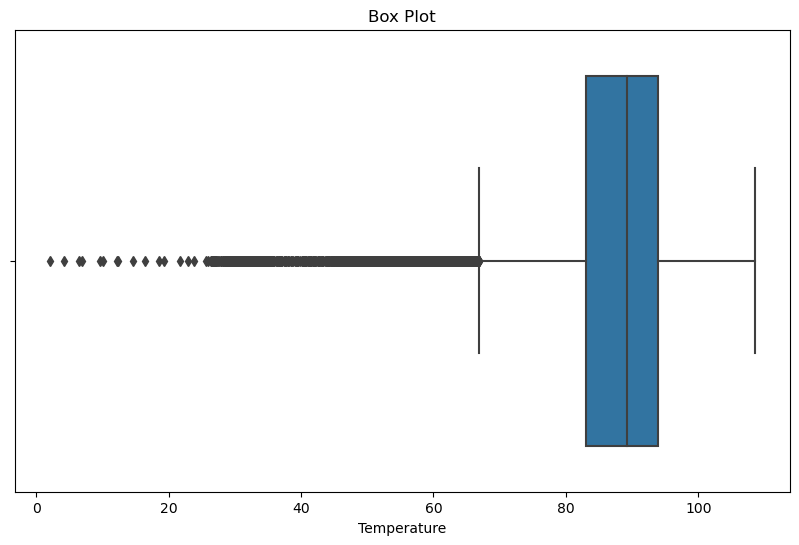

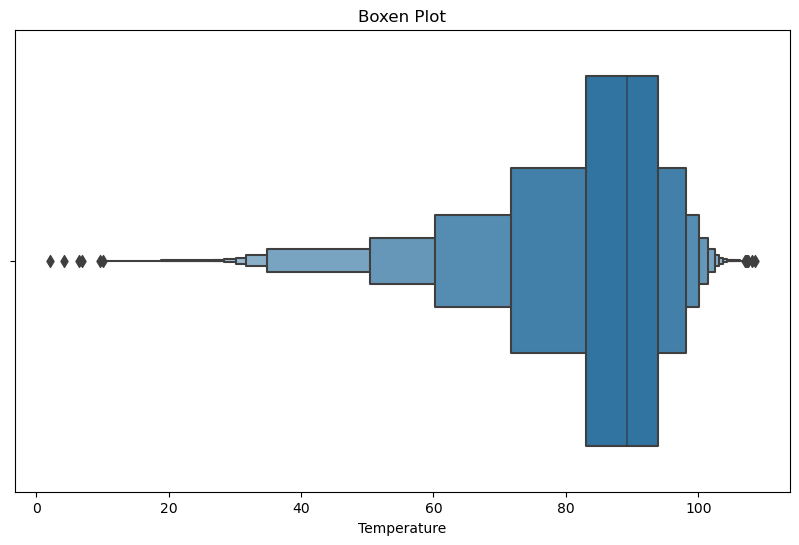

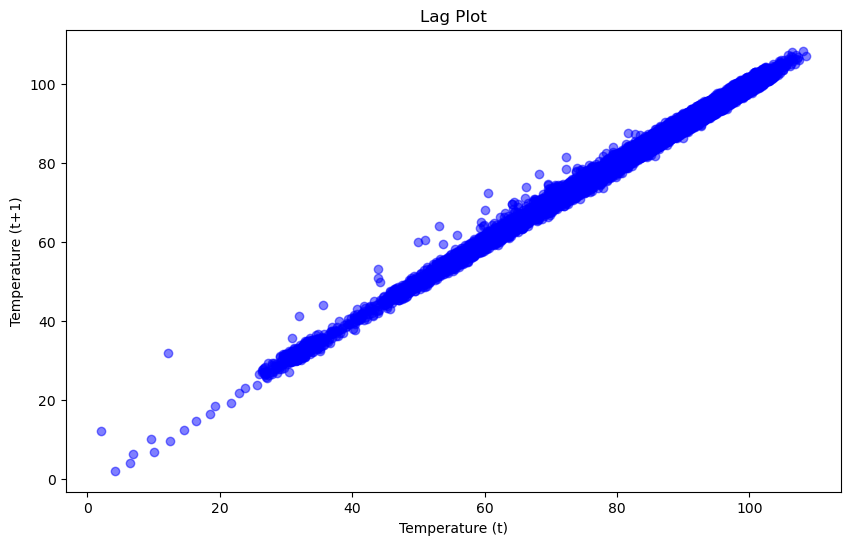

Outliers (IQR method):
Series([], Name: temperature, dtype: float64)


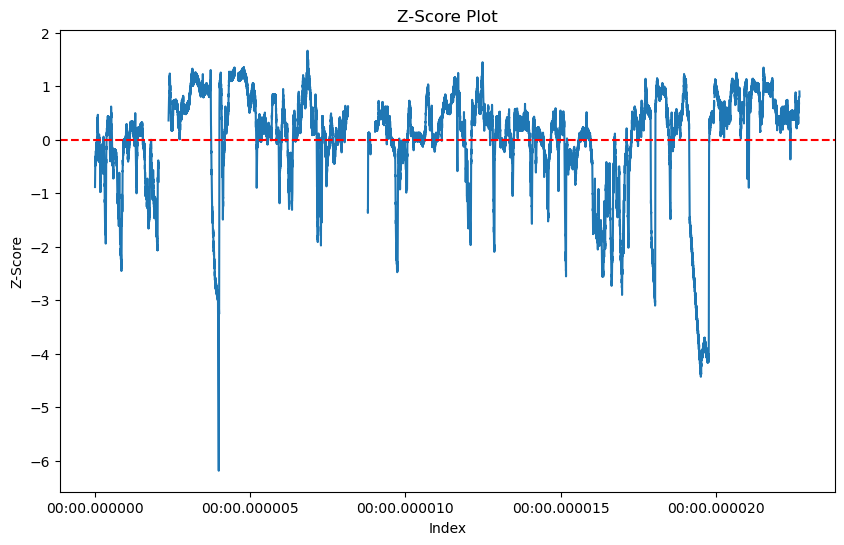

In [56]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_missing['temperature'])
plt.xlabel('Temperature')
plt.title('Box Plot')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxenplot(x=df_missing['temperature'])
plt.xlabel('Temperature')
plt.title('Boxen Plot')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(df_missing['temperature'].shift(), df_missing['temperature'], 'bo', alpha=0.5)
plt.xlabel('Temperature (t)')
plt.ylabel('Temperature (t+1)')
plt.title('Lag Plot')
plt.show()


def iqr_outliers(data):
    q1, q3 = np.percentile(data, [25, 75])
    IQR = q3 - q1
    lower_fence = q1 - (1.5 * IQR)
    upper_fence = q3 + (1.5 * IQR)
    return data[(df_missing.temperature > upper_fence) | (df_missing.temperature < lower_fence)]

outliers_iqr = iqr_outliers(df_missing['temperature'])
print("Outliers (IQR method):")
print(outliers_iqr)

z_scores = (df_missing['temperature'] - df_missing['temperature'].mean()) / df_missing['temperature'].std()

plt.figure(figsize=(10, 6))
plt.plot(z_scores)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Z-Score')
plt.title('Z-Score Plot')
plt.show()